In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('gendergapinaverage new.csv')

In [4]:
df.shape

(413, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            413 non-null    object 
 1   Code               413 non-null    object 
 2   Year               413 non-null    int64  
 3   Gender wage gap %  413 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.0+ KB


In [6]:
df.head()

,country,Code,Year,Gender wage gap %
0,Brazil,BRA,1981,34.21
1,Brazil,BRA,1982,33.66
2,Brazil,BRA,1983,35.75
3,Brazil,BRA,1984,34.04
4,Brazil,BRA,1985,28.58


In [7]:
df.dtypes

country               object
Code                  object
Year                   int64
Gender wage gap %    float64
dtype: object

In [9]:
#statistik Dasar
df.describe()

,Year,Gender wage gap %
count,413.000000,413.000000
mean,2005.159806,10.886949
std,7.820724,10.241873
min,1981.000000,-28.270000
25%,2000.000000,3.920000
50%,2006.000000,10.680000
75%,2012.000000,17.630000
max,2016.000000,35.750000


In [10]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

Year                 12.00
Gender wage gap %    13.71
dtype: float64

In [11]:
df_ex_object = df.select_dtypes(exclude=['object'])

In [12]:
outlier_filter = ((df_ex_object < q1 - 1.5 * iqr) | (df_ex_object > q3 + 1.5 * iqr))
outlier_filter

,Year,Gender wage gap %
0,True,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
408,False,False
409,False,False
410,False,False
411,False,True


In [14]:
#Outlier Detection 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
for col in outlier_filter.columns :

    # Exclude kolom dengan tipe data object
    if df[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())
        print('-------------------')

Nama Kolom: Year
Year
False    412
True       1
Name: count, dtype: int64
-------------------
Nama Kolom: Gender wage gap %
Gender wage gap %
False    409
True       4
Name: count, dtype: int64
-------------------


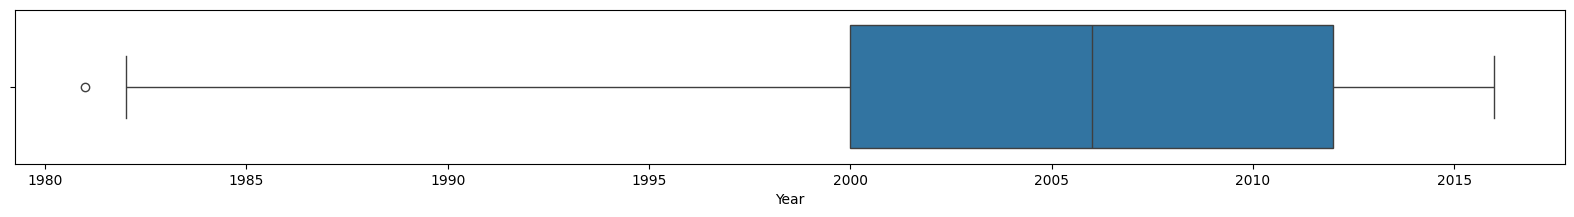

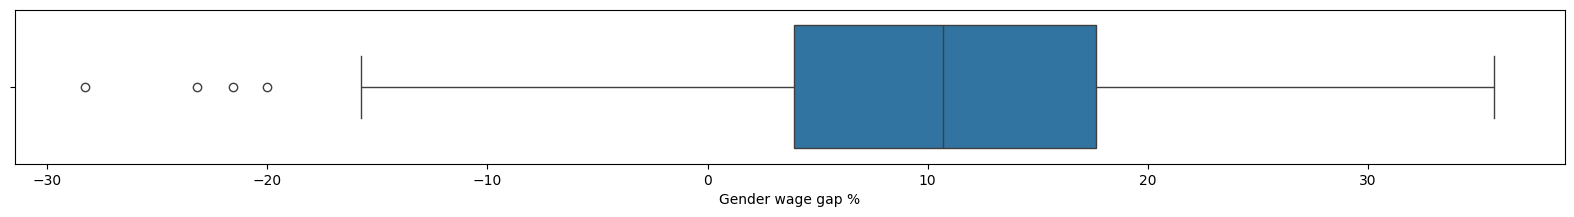

In [16]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [17]:
length_outliers_percentage = len(outlier_filter[outlier_filter['Gender wage gap %'] == True]) / len(df['Gender wage gap %']) * 100
length_outliers_percentage

0.9685230024213075

In [18]:
df.isna().sum()

country              0
Code                 0
Year                 0
Gender wage gap %    0
dtype: int64

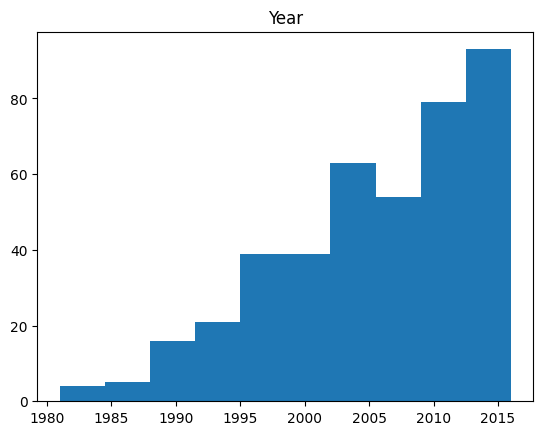

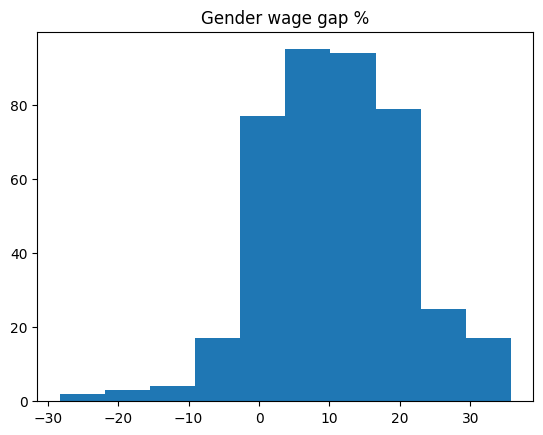

In [19]:
# Melihat Persebaran Data - Histogram
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.hist(df[column])
        plt.title(column)
        plt.show()

In [20]:
#Chek Mising Value 
import pandas as pd 

In [21]:
df = pd.read_csv('gendergapinaverage new.csv')

In [24]:
df['Gender wage gap %'].max()

35.75

In [25]:
df

,country,Code,Year,Gender wage gap %
0,Brazil,BRA,1981,34.21
1,Brazil,BRA,1982,33.66
2,Brazil,BRA,1983,35.75
3,Brazil,BRA,1984,34.04
4,Brazil,BRA,1985,28.58
...,...,...,...,...
408,Portugal,PRT,2016,8.54
409,Romania,ROU,2016,6.61
410,South Korea,KOR,2016,33.59
411,Thailand,THA,2016,-21.57


In [26]:
#
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
data = pd.read_csv('gendergapinaverage new.csv')

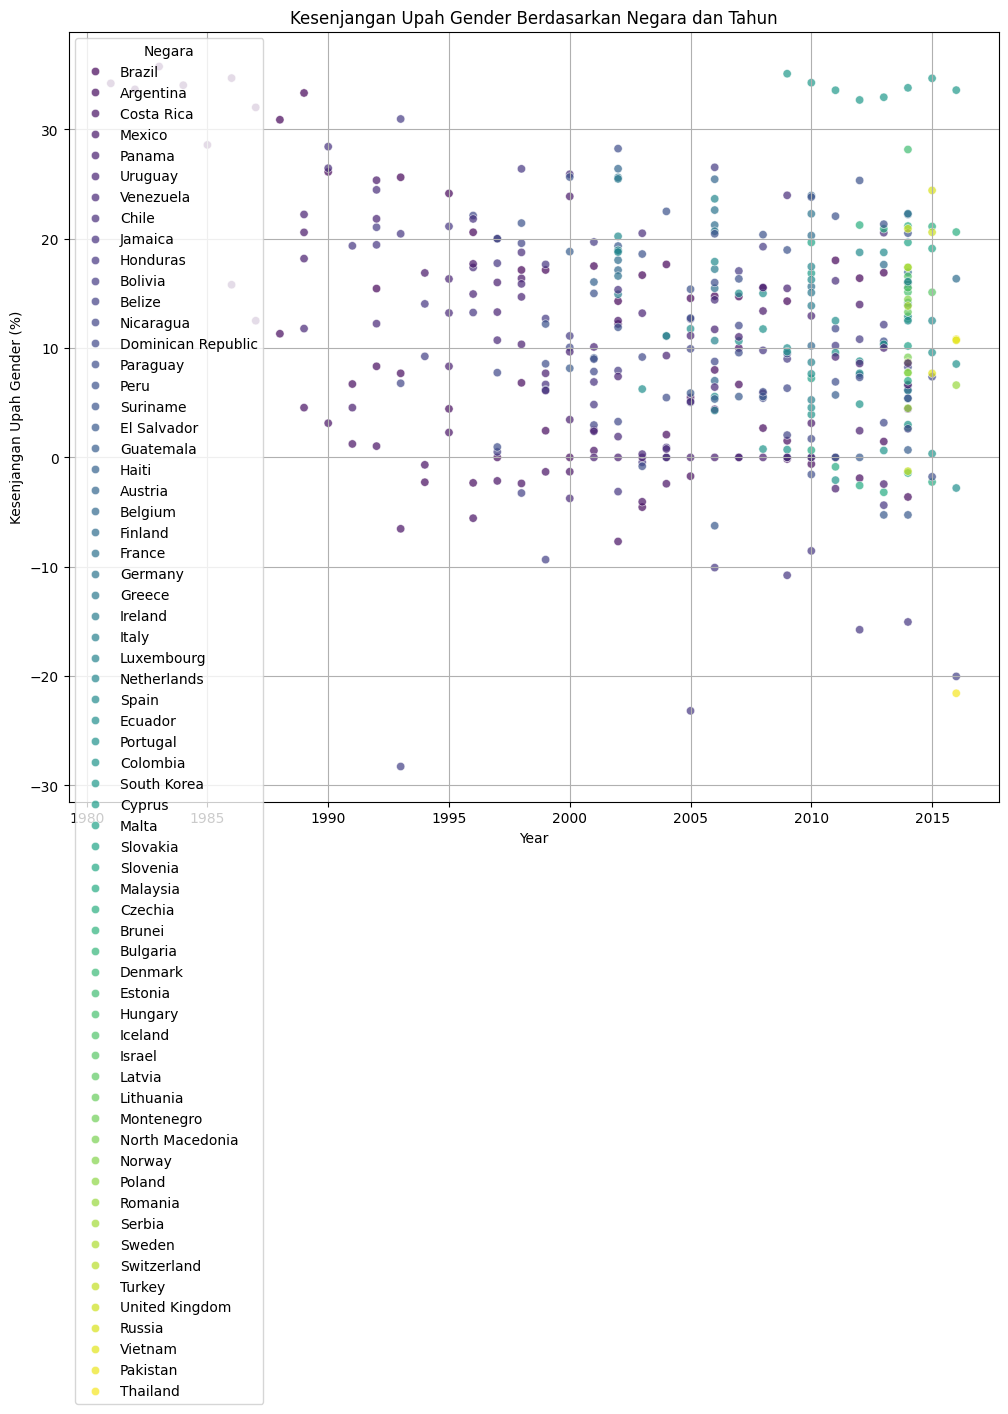

In [44]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Year', y='Gender wage gap %', hue='country', data=data, palette='viridis', alpha=0.7)
plt.title('Kesenjangan Upah Gender Berdasarkan Negara dan Tahun')
plt.xlabel('Year')
plt.ylabel('Kesenjangan Upah Gender (%)')
plt.legend(title='Negara')
plt.grid()

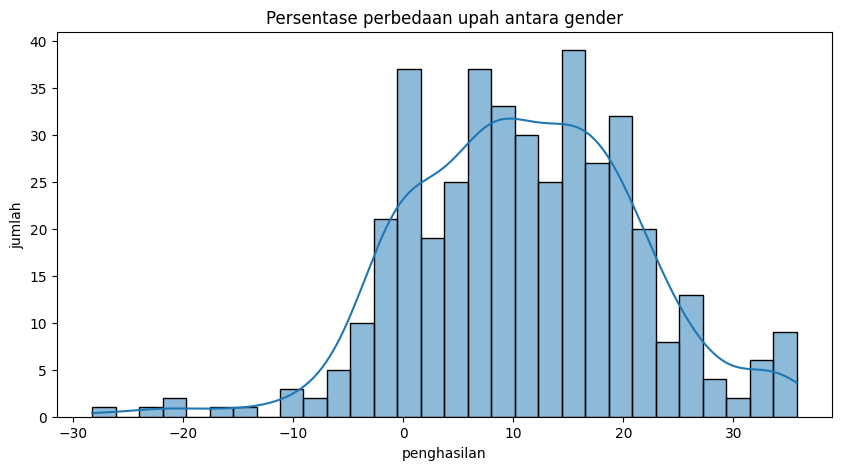

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Gender wage gap %'], bins=30, kde=True)
plt.title('Persentase perbedaan upah antara gender')
plt.xlabel('penghasilan')
plt.ylabel('jumlah')
plt.show()  

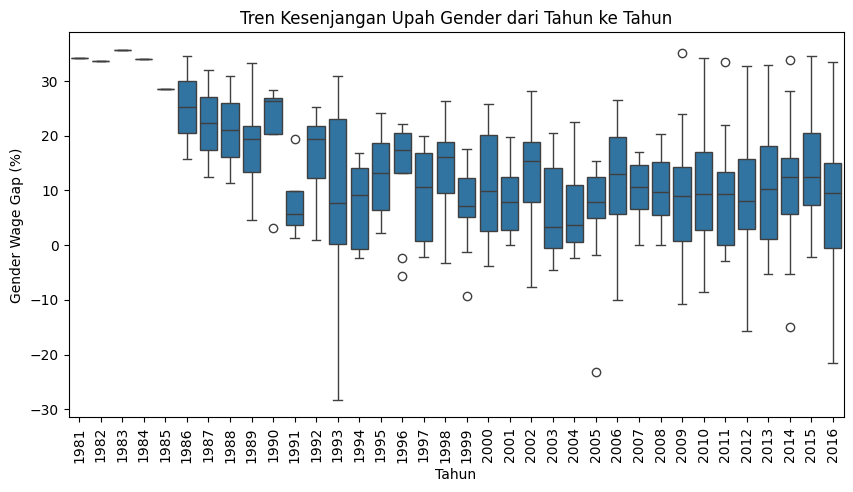

In [42]:
#
plt.figure(figsize=(10, 5))
sns.boxplot(x='Year', y='Gender wage gap %', data=data)
plt.xticks(rotation=90)
plt.title('Tren Kesenjangan Upah Gender dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Gender Wage Gap (%)')
plt.show()

In [69]:
#Modeling 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 

In [70]:
data = pd.read_csv('gendergapinaverage new.csv')

In [71]:
df.head()

,country,Year
0,Brazil,1981
1,Brazil,1982
2,Brazil,1983
3,Brazil,1984
4,Brazil,1985


In [72]:
label_encoder = LabelEncoder()
data['Country_encoded'] = label_encoder.fit_transform(data['country'])

In [73]:
x = data[['Country_encoded', 'Year']]
y = data['Gender wage gap %']

In [74]:
print(X.dtypes)
print(y.dtypes)

country    object
Code       object
Year        int64
dtype: object
float64


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [79]:
y_pred = model.predict(x_test)

In [80]:
#evaluasi Model 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 7.5995420068101796


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [85]:
# Hitung RMSE menggunakan root_mean_squared_error (hanya jika scikit-learn sudah diupdate)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error as rmse_func

In [86]:
# Metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = rmse_func(y_test, y_pred)  # Ini akan menghasilkan MSE, bukan RMSE
# Untuk RMSE, ambil akar kuadrat
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 7.60
Mean Squared Error (MSE): 92.77
Root Mean Squared Error (RMSE): 9.63
R² Score: 0.06
